In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import poppy

In [2]:
airy_osys = poppy.OpticalSystem()
airy_pupil = poppy.CircularAperture(radius=3, pad_factor=4)
airy_osys.add_pupil(airy_pupil)
airy_osys.add_detector(pixelscale=0.010, fov_arcsec=5.0)
airy_psf = airy_osys.calc_psf(2e-6)

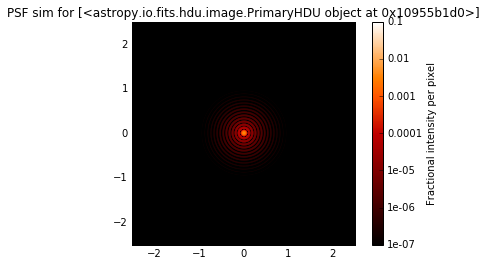

In [3]:
poppy.display_psf(airy_psf)

In [4]:
ap = poppy.MultiHexagonAperture(rings=2, flattoflat=2)
sec = poppy.SecondaryObscuration(secondary_radius=0.5, n_supports=4, support_width=0.1)   # secondary with spiders
hex_aper = poppy.CompoundAnalyticOptic( opticslist=[ap, sec])           # combine into one optic

In [5]:
hex_aper_osys = poppy.OpticalSystem()
hex_aper_osys.add_pupil(hex_aper)
hex_aper_osys.add_detector(pixelscale=0.010, fov_arcsec=2.0)
hex_aper_psf = hex_aper_osys.calc_psf(1e-6)

In [6]:
# coeffs = [0, 0, 0,] + [random.random() * 100e-9 for i in range(7)] + [100e-9]
coeffs = [0,
          0,
          0,
          8.04604268543225e-08,
          9.180924743349227e-08,
          7.127146847320897e-08,
          5.538168741538966e-08,
          2.7169378357264072e-08,
          5.670403168826643e-08,
          3.552389338743162e-08,
          1e-07]
coeffs

[0,
 0,
 0,
 8.04604268543225e-08,
 9.180924743349227e-08,
 7.127146847320897e-08,
 5.538168741538966e-08,
 2.7169378357264072e-08,
 5.670403168826643e-08,
 3.552389338743162e-08,
 1e-07]

In [7]:
hst_osys = poppy.OpticalSystem(name='Aberrated Hubble-like Telescope')

hst_aper = poppy.CompoundAnalyticOptic( opticslist=[
    poppy.SecondaryObscuration(secondary_radius=0.15, n_supports=4, support_width=0.1),
    poppy.CircularAperture(radius=1.2)
])
hst_osys.addPupil(hst_aper)
hst_wfe = poppy.ZernikeWFE(
    coefficients=coeffs,
    radius=1.2
)
hst_osys.addPupil(hst_wfe)
hst_osys.addDetector(pixelscale=0.013, fov_arcsec=3.0)
hst_psf, intermediates = hst_osys.calc_psf(1.5e-6, return_intermediates=True)

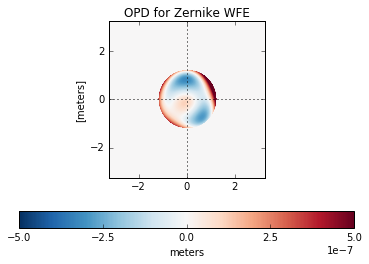

In [8]:
hst_wfe.display(what='opd')

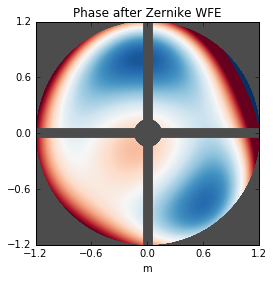

In [9]:
intermediates[1].display(what='phase')

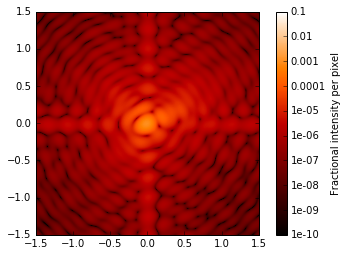

In [10]:
poppy.display_psf(hst_psf, vmin=1e-10, title='')

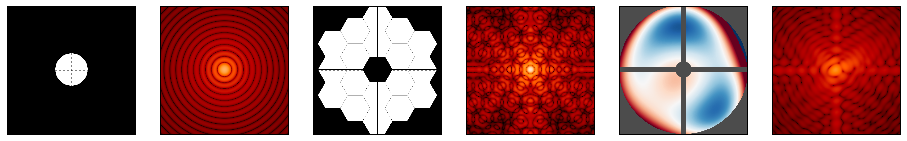

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16, 4))
airy_pupil.display(ax=axes[0], colorbar=False)
poppy.display_psf(airy_psf, ax=axes[1], title='', colorbar=False, vmin=1e-10, imagecrop=1.5)

hex_aper.display(ax=axes[2], colorbar=False)
poppy.display_psf(hex_aper_psf, ax=axes[3], colorbar=False, vmin=1e-10, imagecrop=0.8)

intermediates[1].display(what='phase', ax=axes[4])
poppy.display_psf(hst_psf, ax=axes[5], vmin=1e-10, title='', colorbar=False, imagecrop=3)

for ax in axes:
    ax.set_title('')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig('./readme_fig.png', bbox_inches='tight')